## experimental data fig
Generate subfigures for comparing experimental data

 - Pt and Ni variation
 - W/Me, W/Et, Me/Et
 - Maximum per plate variation

In [1]:
from pymatgen.ext.matproj import MPRester

In [2]:
import DOE_HER

In [3]:
from DOE_HER import load_data

In [4]:
from matplotlib.pyplot import rc

rc("font", **{"family": "sans-serif", "sans-serif": ["Arial"]})

In [5]:
exp_df = load_data.experimental_data()

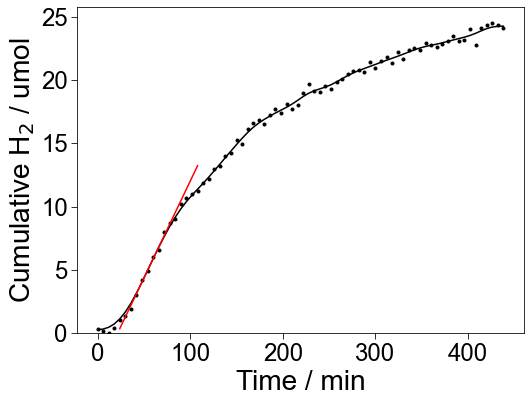

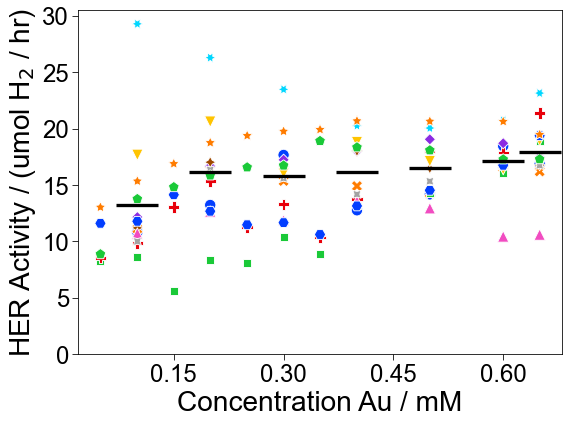

In [6]:
from scipy.ndimage import gaussian_filter
from DOE_HER import utils
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))
ax.tick_params(axis="both", size=6, labelsize=24)
data = exp_df[
    (exp_df.Components == ("Pt", "X"))
    & (
        exp_df.path
        == "/content/drive/Shareddrives/h2-data-science/data/generation-2/02/PtcolCorow"
    )
].loc[4, "Curve"]
ax.plot([x * 6 for x in range(len(data))], data, "k.", markersize=6)
x_pre = 35
x_post = 10
y_low = 0
y_up = max(data) * 1.1
curve = gaussian_filter(data, sigma=2)
ax.plot([x * 6 for x in range(len(data))], curve, "k")
dy = np.correlate(curve, utils.finite_difference(window=3), mode="same")
max_pos = np.argmax(dy)
dy_max = np.amax(dy)
x_plt = np.arange(max_pos - x_pre, max_pos + x_post)
y = dy_max * (x_plt - max_pos) + curve[max_pos]
if y_low != None:
    x_plt = x_plt[y > y_low]
    y = y[y > y_low]
if y_up != None:
    x_plt = x_plt[y < y_up]
    y = y[y < y_up]
ax.plot(x_plt * 6, y, "r")
ax.set_ylim(bottom=0)
ax.set_xlabel("Time / min", fontsize=28)
ax.set_ylabel(r"Cumulative H$_2$ / umol", fontsize=28)
fig.savefig(
    "../figures/exp_fig/max_rate_determination.pdf", bbox_inches="tight", dpi=300
)

metal = "Au"
fig, ax = plt.subplots(figsize=(8, 6))
ax.tick_params(axis="both", size=6, labelsize=24)
ax.set_xticks([0, 0.15, 0.3, 0.45, 0.6])
plot_df = (
    exp_df[
        (exp_df.Components == (metal, "X")) & (exp_df["Concentration_" + metal] < 0.65)
    ]
    .sort_values("path")
    .reset_index(drop=True)
    .copy()
)
sns.scatterplot(
    data=plot_df,
    x="Concentration_" + metal,
    y="MaxRate",
    style="path",
    hue="path",
    palette="bright",
    s=128,
    ax=ax,
    legend=False,
)
sns.scatterplot(
    data=plot_df[
        (
            plot_df.groupby("Concentration_" + metal).transform(lambda x: x.count()) > 5
        ).all(axis=1)
    ]
    .groupby("Concentration_" + metal)
    .MaxRate.mean()
    .reset_index(),
    x="Concentration_" + metal,
    y="MaxRate",
    color="black",
    s=1700,
    marker="_",
    ax=ax,
)

plt.ylim(bottom=0)
ax.set_xlabel("Concentration %s / mM" % metal, fontsize=28)
ax.set_ylabel("HER Activity / (umol H$_2$ / hr)", fontsize=28)

plt.tight_layout()
fig.savefig(
    "../figures/exp_fig/experimental_variability_fig.pdf", bbox_inches="tight", dpi=300
)